In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [98]:
zi_2015_1 = r"E:\REMM\REMMRun_0\zone_indicators_2179_2015.csv"
#zi_2015_2 = r"E:\REMM\REMMRun_1\zone_indicators_28_2015.csv"
#zi_2015_2 = r"E:\REMM\REMMRun_2\zone_indicators_75_2015.csv"
zi_2015_2 = r"E:\Projects\REMM2_For_Python3\REMMRun\zone_indicators_122_2015.csv"
#zi_2015_2 = r"E:\Projects\REMM_Original\REMMRun\zone_indicators_3_2015.csv"

zi_2015_1 = pd.read_csv(zi_2015_1)
zi_2015_2 = pd.read_csv(zi_2015_2)

In [5]:
zi_2015_1.columns

Index(['zone_id', 'households', 'residential_units', 'population',
       'res_price1', 'res_price2', 'avg_hh_income', 'hh_inc1', 'hh_inc2',
       'hh_inc3', 'hh_inc4', 'jobs', 'jobs1', 'jobs2', 'jobs3', 'jobs4',
       'jobs5', 'jobs6', 'jobs7', 'jobs8', 'jobs9', 'jobs10', 'job_spaces',
       'non_residential_sqft', 'nonres_price3', 'nonres_price4',
       'nonres_price5', 'COUNTY', 'pop_adjust'],
      dtype='object')

In [6]:
zi_2015_1.shape

(2725, 29)

In [4]:
zi_2015_2.columns

Index(['zone_id', 'households', 'residential_units', 'population',
       'res_price1', 'res_price2', 'avg_hh_income', 'hh_inc1', 'hh_inc2',
       'hh_inc3', 'hh_inc4', 'jobs', 'jobs1', 'jobs2', 'jobs3', 'jobs4',
       'jobs5', 'jobs6', 'jobs7', 'jobs8', 'jobs9', 'jobs10', 'job_spaces',
       'non_residential_sqft', 'nonres_price3', 'nonres_price4',
       'nonres_price5', 'COUNTY', 'pop_adjust'],
      dtype='object')

In [7]:
zi_2015_2.shape

(2725, 29)

In [99]:
zi_2015_1 = zi_2015_1[['zone_id', 'COUNTY', 'households', 'population', 'res_price1', 'nonres_price4', 'nonres_price5']].copy()
zi_2015_2 = zi_2015_2[['zone_id', 'COUNTY', 'households', 'population', 'res_price1', 'nonres_price4', 'nonres_price5']].copy()

In [100]:
merged = zi_2015_1.merge(zi_2015_2, left_on = 'zone_id', right_on = 'zone_id' , how = 'inner')
merged.head()

,zone_id,COUNTY_x,households_x,population_x,res_price1_x,nonres_price4_x,nonres_price5_x,COUNTY_y,households_y,population_y,res_price1_y,nonres_price4_y,nonres_price5_y
0,2859,4,23.0,67.214494,27.130846,0.000000,0.000000,49,23.0,67.214494,27.130846,0.000000,0.000000
1,141,1,133.0,372.557001,65.659543,112.795817,121.425198,11,133.0,532.440918,65.659543,112.795817,121.424179
2,2865,4,29.0,96.561667,32.020883,0.000000,0.000000,49,29.0,96.561667,32.020883,0.000000,0.000000
3,1914,4,0.0,0.000000,0.000000,0.000000,0.000000,49,0.0,0.000000,0.000000,0.000000,0.000000
4,2860,4,1.0,1.893366,38.966667,0.000000,0.000000,49,1.0,1.893366,38.966667,0.000000,0.000000


In [101]:
merged['nonres_price4_d'] = merged['nonres_price4_x'].astype(float) - merged['nonres_price4_y'].astype(float)

In [102]:
merged2 = merged[(merged['nonres_price4_d'] >= 2) | (merged['nonres_price4_d'] <= -2)]
merged2.to_csv(r'./Results/nonres_price4.csv', index = False)
merged2.shape

(142, 14)

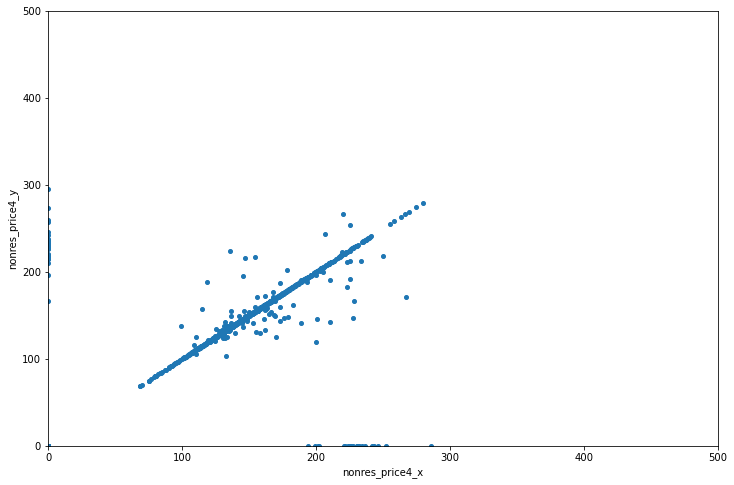

In [103]:
merged.plot.scatter(x='nonres_price4_x', y= 'nonres_price4_y', figsize=(12,8), s=16, xlim=(0,500), ylim=(0,500))

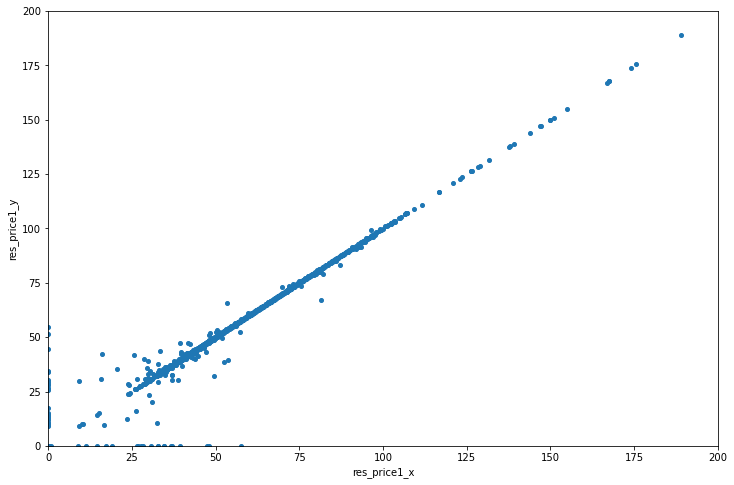

In [104]:
merged.plot.scatter(x='res_price1_x', y= 'res_price1_y', figsize=(12,8), s=16, xlim=(0,200), ylim=(0,200))

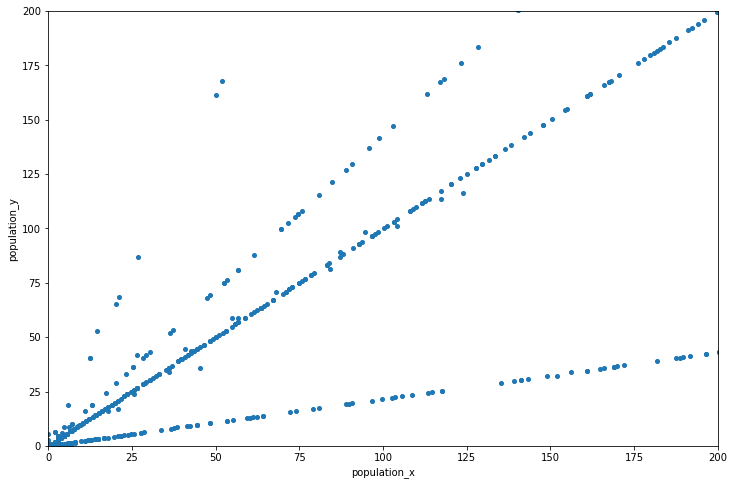

In [105]:
merged.plot.scatter(x='population_x', y= 'population_y', figsize=(12,8), s=16, xlim=(0,200), ylim=(0,200))

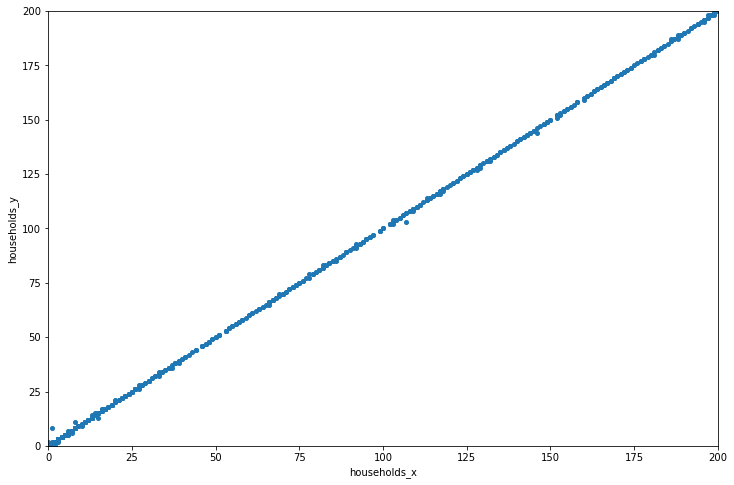

In [106]:
merged.plot.scatter(x='households_x', y= 'households_y', figsize=(12,8), s=16, xlim=(0,200), ylim=(0,200))